In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la

In [2]:
# Plasma definitions :
# omega_c = e * B_o /m_e -- electron cyclotron frequency
# omega_pe = sqrt(ne*e*e/(me*epsilon))

# constants 
c=299792458.                   # speed of light
e=1.60217662*np.power(10.,-19) # elementary charge
me=9.10938356*np.power(10.,-31) # electron mass
epsilon=8.8541878128*np.power(10.,-12) # permittivity of free space

# parameters
e_skinDepth = .0004 #  e_skinDepth = c/omega_pe
factor = 20  # half thickness of current sheet = factor * e_skindepth
sigma = 50 #(omega_c/omega_pe)**2
beta = 0.3 # beta = v/c
gamma = 1./np.sqrt(1-beta*beta)
mu_o=1.25663706212*np.power(10.,-6)

# derived values
ne = c*c*me*epsilon/(e_skinDepth*e_skinDepth*e*e) 
delta = factor * e_skinDepth
omega_pe = np.sqrt( (ne*e*e)/(me*epsilon) )

Bo = np.sqrt(sigma)*omega_pe*me/e




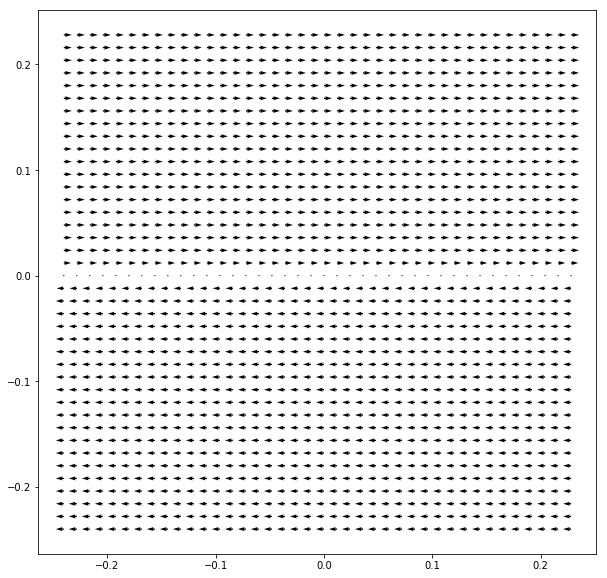

In [3]:
#Magnetic Field
l = 600*e_skinDepth
grid=40
x=np.arange(-l,l,2*l/grid)
y=np.arange(-l,l,2*l/grid)
u,v=np.meshgrid(x,y)
u=Bo*np.tanh(v/(e_skinDepth*factor))
v=np.zeros(u.shape)
plt.quiver(x,y,u,v)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(10,10)

#im=plt.pcolormesh(x,y,u)
#plt.gcf().colorbar(im)
#plt.gcf().set_facecolor('white')
#plt.gcf().set_size_inches(12,10)



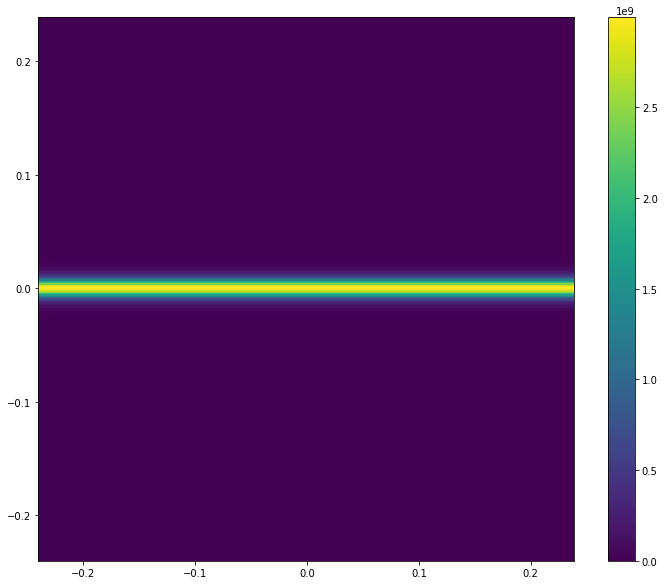

In [4]:
#Current
l = 600*e_skinDepth
grid=400
x=np.arange(-l,l,2*l/grid)
y=np.arange(-l,l,2*l/grid)
u,v=np.meshgrid(x,y)
jy = (Bo/(mu_o*e_skinDepth*factor)) * (1-(np.tanh(v/(e_skinDepth*factor)*np.tanh(v/(factor*e_skinDepth)))))

im=plt.pcolormesh(x,y,jy)
plt.gcf().colorbar(im)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(12,10)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


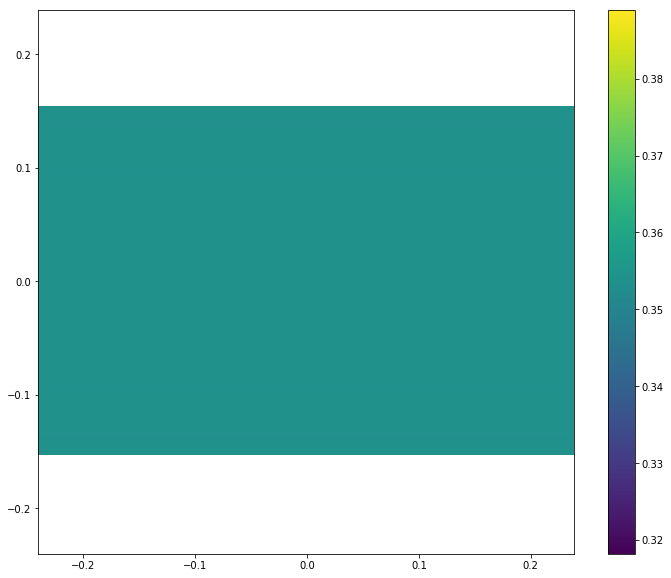

In [5]:
nx = ne*(1-(np.tanh(v/(e_skinDepth*factor)*np.tanh(v/(factor*e_skinDepth)))))
im=plt.pcolormesh(x,y,jy/nx/e/c)
plt.gcf().colorbar(im)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(12,10)